## Lab 9: KOH2: Sieć Kohonena na siatce sześciokątnej (1 tydzień, bez punktów, sprawozdanie po tym tygodniu)

Do implementacji z zeszłego tygodnia dodać możliwość ułożenia neuronów w topologii siatki sześciokątnej.

Zastosować oba warianty topologii i obie funkcje sąsiedztwa do wektorów danych ze zbiorów:
- [MNIST](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)
- [Human Activity Recognition Using Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

(sieć Kohonena uruchomić na zbiorach bez etykiet!).

Przeanalizować otrzymane mapowanie danych uwzględniając etykiety danych. 

Jak dobrze znalezione klastry odpowiadają podziałowi na klasy?

## TODO:
- ~~imlpement hexagonal map~~ //done earlier
- test rectangle map on MNIST
- test hexagonal map on MNIST
- test rectangle map on UCI
- test hexagonal map on UCI

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SelfOrganizingMap as SOM
from sklearn.manifold import TSNE
colors = ['r','g','b','c','k','y',(0.9,0.2,0.9), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]

## Dataset 1: MNIST

In [41]:
df_train = pd.read_csv('data/mnist_train.csv')
df_test = pd.read_csv('data/mnist_test.csv')

x_train = df_train.drop('label',axis=1).to_numpy()
y_train = df_train[["label"]].to_numpy()

x_test = df_test.drop('label',axis=1).to_numpy()
y_test = df_test[["label"]].to_numpy()

print(f"Train size: {x_train.shape}")
print(f"Test size: {x_test.shape}")

Train size: (60000, 784)
Test size: (10000, 784)


C:\Users\matem\miniconda3\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\matem\miniconda3\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


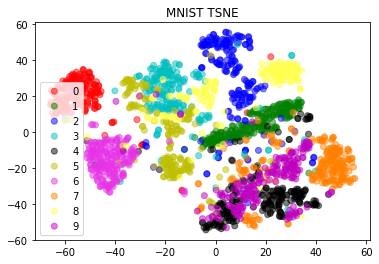

In [42]:
model = TSNE(n_components=2, random_state=123)
tsne_data = model.fit_transform(x_train[:2000])
tsne_data = np.vstack((tsne_data.T, y_train[:2000].T)).T

# Ploting the result of tsne
for label in np.unique(y_train):
    filtered = tsne_data[tsne_data[:,2] == label]
    plt.scatter(filtered[:,0],filtered[:,1],c=np.array(colors, dtype=object)[filtered[:,2].astype(int)], alpha=0.5, label=label)
plt.title("MNIST TSNE")
plt.legend()
plt.show()

### Map elements: squares

In [50]:
som = SOM.SelfOrganizingMap(10,10,784, hexagonal_map=False)
som.init_weights()
som.train(data=x_train[:5000], epochs=10,neighbourhood_scaler=0.05, learning_rate=0.3)

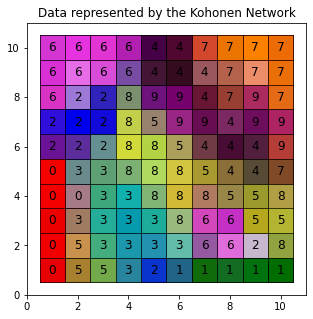

In [52]:
som.plot_map(data=x_train[:10000], classes=y_train[:10000], symbols=False, labels=[i for i in range(10)])

### Map elements: hexagons

In [53]:
som = SOM.SelfOrganizingMap(5,5,784, hexagonal_map=True)
som.init_weights()
som.train(data=x_train[:1000], epochs=10,neighbourhood_scaler=0.15, learning_rate=0.3)

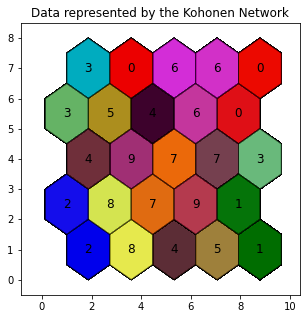

In [54]:
som.plot_map(data=x_train[:5000], classes=y_train[:5000], symbols=False, labels=[i for i in range(10)])

## Dataset 2: 

In [21]:
df_train_x = pd.read_csv("data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, delim_whitespace=True)
df_train_y = pd.read_csv("data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None, delim_whitespace=True)
df_test_x = pd.read_csv("data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", header=None, delim_whitespace=True)
df_test_y = pd.read_csv("data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None, delim_whitespace=True)

x_train = df_train_x.to_numpy()
y_train = df_train_y.to_numpy() - 1
x_test = df_test_x.to_numpy()
y_test = df_test_y.to_numpy() - 1

print(f"Train size: {x_train.shape}")
print(f"Test size: {x_test.shape}")

Train size: (7352, 561)
Test size: (2947, 561)


C:\Users\matem\miniconda3\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\matem\miniconda3\envs\ml\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


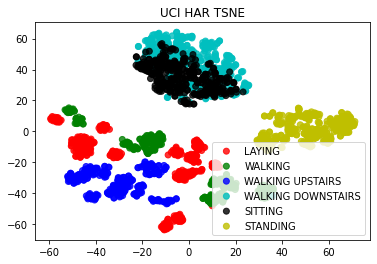

In [22]:
model = TSNE(n_components=2, random_state=123)
tsne_data = model.fit_transform(x_train[:2000])
tsne_data = np.vstack((tsne_data.T, y_train[:2000].T)).T

classes = ["WALKING", "WALKING UPSTAIRS", "WALKING DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
# Ploting the result of tsne
for label in np.unique(y_train):
    filtered = tsne_data[tsne_data[:,2] == label]
    plt.scatter(filtered[:,0],filtered[:,1],c=np.array(colors, dtype=object)[filtered[:,2].astype(int)], alpha=0.8, label=classes[label-1])
plt.legend()
plt.title("UCI HAR TSNE")
plt.show()

### Map elements: squares

In [13]:
som = SOM.SelfOrganizingMap(10,10,561, hexagonal_map=False)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.5, learning_rate=0.3)

Class 0: WALKING
Class 1: WALKING UPSTAIRS
Class 2: WALKING DOWNSTAIRS
Class 3: SITTING
Class 4: STANDING
Class 5: LAYING


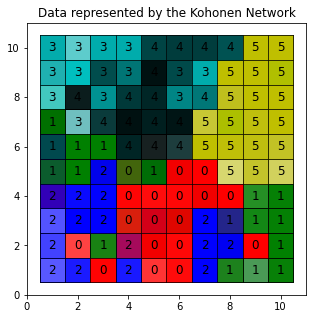

In [23]:
for i in range(6):
    print(f"Class {i}: {classes[i]}")
som.plot_map(data=x_train, classes=y_train, symbols=False, labels = [i for i in range(6)])

### Map elements: hexagons

In [38]:
som = SOM.SelfOrganizingMap(6,4,561, hexagonal_map=True)
som.init_weights()
som.train(data=x_train, epochs=10,neighbourhood_scaler=0.3, learning_rate=0.3)

Class 0: WALKING
Class 1: WALKING UPSTAIRS
Class 2: WALKING DOWNSTAIRS
Class 3: SITTING
Class 4: STANDING
Class 5: LAYING


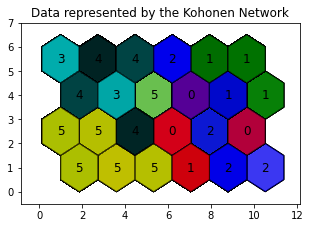

In [39]:
for i in range(6):
    print(f"Class {i}: {classes[i]}")
som.plot_map(data=x_train, classes=y_train, symbols=False, labels = [i for i in range(6)])

# Summary

In general, SOM did a good job of separating data. Results are similar to those obtained using T-SNE.